In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
forest=pd.read_csv("C:/Excelr/forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.shape

(517, 31)

# EDA

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
lb=LabelEncoder()
forest['size_category']=lb.fit_transform(forest['size_category'])

In [7]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

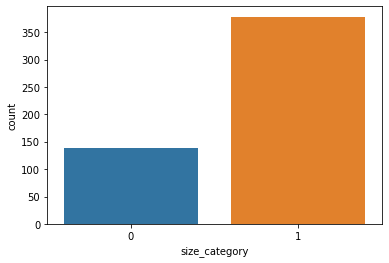

In [8]:
import seaborn as sns
sns.countplot(x='size_category',data=forest)

In [9]:
forest1=forest.drop(['month','day'],axis=1)

In [10]:
array=forest1.values
array
x=array[:,0:28]
y=array[:,28]

In [11]:
x

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
x_train.shape,x_test.shape

((361, 28), (156, 28))

# Grid Search CV

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model=SVC()

In [15]:
model.fit(x_train,y_train)

SVC()

In [16]:
param_grid = {'C': [0.5,10, 50, 200], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','linear', 'poly']} 

In [17]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [18]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.973 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 10, 50, 200],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}

In [20]:
grid_predictions=grid.predict(x_test)


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
print(confusion_matrix(grid_predictions,y_test))
print(classification_report(grid_predictions,y_test))

[[ 37   1]
 [  3 115]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        38
         1.0       0.99      0.97      0.98       118

    accuracy                           0.97       156
   macro avg       0.96      0.97      0.97       156
weighted avg       0.98      0.97      0.97       156



In [23]:
np.mean(grid_predictions==y_test)*100

97.43589743589743